# Year 2023 Day 05


In [ ]:
import json
from typing import Literal

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Markdown as md
from pyobsplot import Obsplot, Plot

from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.visualization.plotly import (
    ValuedLink,
    build_sankey_figure,
    to_plotly_sankey_input,
)
from advent_of_code.y_2023.problem_202305 import AdventOfCodeProblem202305, Almanac

In [ ]:
op = Obsplot(renderer="jsdom", theme="dark")  # Literal['current','light','dark']

In [ ]:
problem = AdventOfCodeProblem202305()
problem

In [ ]:
# test_input = example_inputs_2023.retrieve(__file__)
# almanac = parse_almanac(test_input)

example_input = get_example_inputs_file_contents(2023)["test_problem_202305"][
    "EXAMPLE_INPUT"
]

## With Example Input


In [ ]:
almanac = problem.parse_text_input(example_input)

In [ ]:
almanac

In [ ]:
almanac.maps

In [ ]:
categories = [am.source_category for am in almanac.maps] + [
    almanac.maps[-1].destination_category
]
categories

In [105]:
def create_lines_df(
    almanac: Almanac, *, mode: Literal["single", "couple"]
) -> pd.DataFrame:
    lines = []

    for idx, am in enumerate(almanac.maps):
        for r in am.ranges:
            x1_start = r.source_range_start
            x2_start = r.destination_range_start
            x1_end = x1_start + r.range_length
            x2_end = x2_start + r.range_length
            y1 = idx
            y2 = idx + 1

            use_category_names = True
            if use_category_names:
                y1 = categories[y1]
                y2 = categories[y2]

            if mode == "single":
                singles = ((x1_start, x2_start),)

                do_center = True
                for x1, x2 in singles:
                    if do_center:
                        lines.append(
                            (
                                x1 + r.range_length / 2,
                                y1,
                                x2 + r.range_length / 2,
                                y2,
                                r.range_length,
                            )
                        )
                    else:
                        lines.append((x1, y1, x2, y2, r.range_length))
            elif mode == "couple":
                couples = (x1_start, x2_start), (x1_end, x2_end)
                for x1, x2 in couples:
                    lines.append((x1, y1, x2, y2, r.range_length))
            else:
                raise NotImplementedError

    lines_df = pd.DataFrame(lines, columns=["x1", "y1", "x2", "y2", "range_length"])
    return lines_df


lines_df = create_lines_df(almanac, mode="couple")
lines_df[:4]
lines_df

,x1,y1,x2,y2,range_length
0,98,seed,50,soil,2
1,100,seed,52,soil,2
2,50,seed,52,soil,48
3,98,seed,100,soil,48
4,15,soil,0,fertilizer,37
5,52,soil,37,fertilizer,37
6,52,soil,37,fertilizer,2
7,54,soil,39,fertilizer,2
8,0,soil,39,fertilizer,15
9,15,soil,54,fertilizer,15


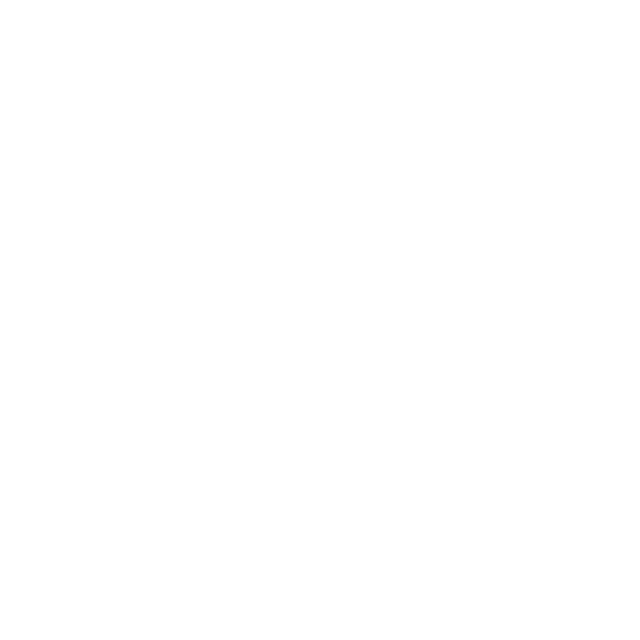

In [106]:
def show_links(lines_df: pd.DataFrame):
    # lines_df : DataFrame with columns x1	y1	x2	y2
    return op(  # type: ignore
        dict(
            height=640,
            width=640,
            marginLeft=100,  # make room for the y-axis
            x=dict(label="Identifier number", tickFormat=".0s"),
            y=dict(
                label="Category",
                domain=categories,
                type="band",
                padding=0,
            ),
            marks=[
                Plot.link(
                    lines_df,
                    dict(
                        x1=lines_df["x1"].to_list(),
                        y1=lines_df["y1"].to_list(),
                        x2=lines_df["x2"].to_list(),
                        y2=lines_df["y2"].to_list(),
                        markerEnd="arrow",
                        stroke="currentColor",
                        strokeOpacity=0.3,
                        curve="bump-y",
                        strokeWidth=2,
                        # strokeWidth=lines_df["range_length"].to_list(),  # new
                    ),
                ),
            ],
        )
    )


show_links(lines_df)

TODO Use the Link mark https://observablehq.com/plot/marks/link

y = [seed, soil..., humidity] = [0, 1, ...] with [`reverse=True`](https://observablehq.com/plot/features/scales) option
x = constant for all filter = input range

See the reference: https://www.reddit.com/r/adventofcode/comments/18b82w0/2023_day_5_part_2_visualizing_all_the_mapping/


In [161]:
centered_lines_df = create_lines_df(almanac, mode="single")
centered_lines_df

,x1,y1,x2,y2,range_length
0,99.0,seed,51.0,soil,2
1,74.0,seed,76.0,soil,48
2,33.5,soil,18.5,fertilizer,37
3,53.0,soil,38.0,fertilizer,2
4,7.5,soil,46.5,fertilizer,15
5,57.0,fertilizer,53.0,water,8
6,32.0,fertilizer,21.0,water,42
7,3.5,fertilizer,45.5,water,7
8,9.0,fertilizer,59.0,water,4
9,21.5,water,91.5,light,7


In [211]:
centered_lines_df[0:3]

,x1,y1,x2,y2,range_length
0,99.0,seed,51.0,soil,2
1,74.0,seed,76.0,soil,48
2,33.5,soil,18.5,fertilizer,37


[12.8, 307.2, 236.8, 12.8, 96.0, 51.2, 268.8, 44.8, 25.6, 44.8, 448.0, 147.2, 121.6, 83.2, 6.4, 441.6, 236.8, 25.6]


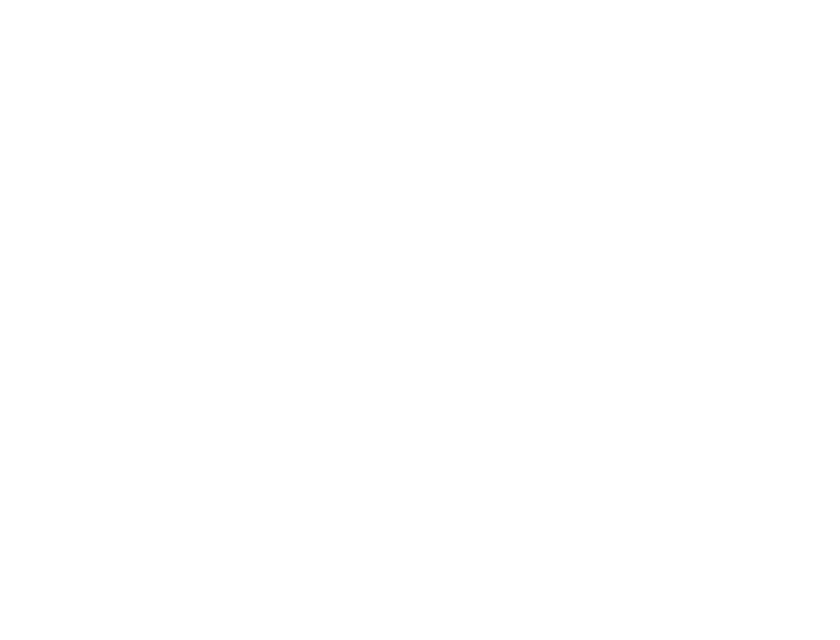

In [237]:
def show_links_surface(
    lines_df: pd.DataFrame,
    width=640,
    max_x=100,
    margin_left=100,
    margin_right=100,
    verbose=False,
):
    # lines_df : DataFrame with columns x1	y1	x2	y2

    strokeWidth = (lines_df["range_length"] * width / max_x).to_list()
    if verbose:
        print(strokeWidth)
    return op(  # type: ignore
        dict(
            grid=True,
            height=width,
            width=width + margin_left + margin_right,
            marginLeft=margin_left,  # make room for the y-axis
            marginRight=margin_right,
            x=dict(
                label="Identifier number",
                ticks=10,
                tickFormat=".0s",
                nice=True,
                domain=[0, max_x],
            ),
            y=dict(
                label="Category",
                domain=categories,
                type="band",
                padding=0,
            ),
            marks=[
                # Plot.link(
                #     lines_df,
                #     dict(
                #         x1=lines_df["x1"].to_list(),
                #         y1=lines_df["y1"].to_list(),
                #         x2=lines_df["x2"].to_list(),
                #         y2=lines_df["y2"].to_list(),
                #         # markerEnd="arrow",
                #         stroke="currentColor",
                #         strokeOpacity=0.3,
                #         curve="bump-y",
                #         tension=10000,
                #         # strokeWidth = 1,
                #         strokeWidth=strokeWidth,
                #     ),
                # ),
                Plot.link(
                    lines_df,
                    dict(
                        x1=lines_df["x1"].to_list(),
                        y1=lines_df["y1"].to_list(),
                        x2=lines_df["x2"].to_list(),
                        y2=lines_df["y2"].to_list(),
                        # markerEnd="arrow",
                        stroke="currentColor",
                        strokeOpacity=0.4,
                        curve="bump-y",
                        tension=0,
                        strokeWidth = 30,
                    ),
                ),
            ],
        )
    )


show_links_surface(centered_lines_df, verbose=True)

## With Actual Input


In [ ]:
show_links(create_lines_df(problem.parse_input_text_file()))